# **<center>Predictive Analytics for Inventory Management</center>**

## **Project Ovrview**
<p style ='text-align:justify'>This project applies machine learning techniques to improve inventory management through accurate demand forecasting. Historical sales data—including product line, status, deal size, order date, and quantity ordered—forms the foundation for the analysis.</p>


## **Purpose**
<p style ='text-align:justify'>
The purpose of this project is to build a machine learning–based system that predicts which products are likely to run out in the upcoming month and suggests optimal restock quantities.
By analyzing historical sales trends, product lines, deal sizes, and order statuses, the model forecasts future product demand with high accuracy. This helps inventory managers make data-driven decisions, prevent stockouts, and maintain optimal stock levels.</p>

### **Load data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Anaconda\Ddata.csv",encoding='latin1')

### **Explore Data**

In [3]:
#check for missing values
df.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED     202
PRICEEACH           196
ORDERLINENUMBER       0
SALES               395
ORDERDATE             0
STATUS                0
QTR_ID                0
MONTH_ID              0
YEAR_ID               0
PRODUCTLINE           0
PRODUCTNAME           0
CUSTOMERNAME        203
PHONE               427
ADDRESS             197
CITY                  0
STATE                 0
POSTALCODE            0
COUNTRY               0
TERRITORY             0
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64

In [4]:
#display firt 5 rows of data
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESS,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,251077,7.0,49.22,4,344.54,2025-08-26,Cancelled,3,8,2025,...,+1-118-206-9709,"5375 David Island, Schneiderborough, PA 74338",Michelleberg,Nevada,65410,Syrian Arab Republic,South,Lee,Gregory,Small
1,625198,18.0,217.14,3,3908.52,2025-07-31,Canceled,3,7,2025,...,+1-149-903-7186x756,"72798 Morales Spur, South Sarahshire, MN 30265",West Stevenfurt,Nebraska,13879,Peru,North,Johnson,Jean,Small
2,728590,15.0,240.78,2,3611.70,2025-10-04,On Hold,4,10,2025,...,001-076-803-7403x02970,"025 Morton Row Suite 074, Port Darrellland, OR...",South Josephside,Arkansas,82454,Kuwait,North,Wiggins,Alexis,Large
3,185905,11.0,148.20,4,1630.20,2025-09-12,OnHold,3,9,2025,...,654.901.6841,"684 Ortiz Camp Apt. 049, Catherineshire, MN 46358",North Gregory,Oklahoma,7650,Chad,Unknown,Warren,Hunter,Small
4,994751,15.0,128.16,1,1922.40,2024-12-25,Shipped,4,12,2024,...,170.104.2671,"PSC 1099, Box 1432, APO AA 58845",Port Charlesville,Maine,54662,Belarus,East,Williams,Kristina,Large


In [5]:
#understand data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       20000 non-null  int64  
 1   QUANTITYORDERED   19798 non-null  float64
 2   PRICEEACH         19804 non-null  float64
 3   ORDERLINENUMBER   20000 non-null  int64  
 4   SALES             19605 non-null  float64
 5   ORDERDATE         20000 non-null  object 
 6   STATUS            20000 non-null  object 
 7   QTR_ID            20000 non-null  int64  
 8   MONTH_ID          20000 non-null  int64  
 9   YEAR_ID           20000 non-null  int64  
 10  PRODUCTLINE       20000 non-null  object 
 11  PRODUCTNAME       20000 non-null  object 
 12  CUSTOMERNAME      19797 non-null  object 
 13  PHONE             19573 non-null  object 
 14  ADDRESS           19803 non-null  object 
 15  CITY              20000 non-null  object 
 16  STATE             20000 non-null  object

In [6]:
df.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'PRODUCTNAME', 'CUSTOMERNAME', 'PHONE', 'ADDRESS',
       'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [7]:
df['PRODUCTNAME'].unique()

array(['Dumbbell Set', 'Mystery Novel', 'Smartphone',
       'Science Fiction Novel', 'Vacuum Cleaner', 'Summer T-Shirt',
       'Leather Jacket', 'Coffee Maker', 'Face Cream', 'Cookware Set',
       'Biography', 'Soccer Ball', 'History Book', 'Air Fryer',
       'Running Shoes', 'Tennis Racket', 'Hoodie', 'Cookbook',
       'Sunscreen', 'Jeans', 'Smartwatch', 'Bluetooth Speaker', 'Shampoo',
       'Lipstick Set', 'Running Shorts', 'Perfume', 'Blender Set',
       'Yoga Mat', 'Wireless Headphones', 'Laptop'], dtype=object)

In [8]:
df['PRODUCTNAME'].unique()

array(['Dumbbell Set', 'Mystery Novel', 'Smartphone',
       'Science Fiction Novel', 'Vacuum Cleaner', 'Summer T-Shirt',
       'Leather Jacket', 'Coffee Maker', 'Face Cream', 'Cookware Set',
       'Biography', 'Soccer Ball', 'History Book', 'Air Fryer',
       'Running Shoes', 'Tennis Racket', 'Hoodie', 'Cookbook',
       'Sunscreen', 'Jeans', 'Smartwatch', 'Bluetooth Speaker', 'Shampoo',
       'Lipstick Set', 'Running Shorts', 'Perfume', 'Blender Set',
       'Yoga Mat', 'Wireless Headphones', 'Laptop'], dtype=object)

In [9]:

df['TERRITORY'].unique()

array(['South', 'North', 'Unknown', 'East', 'West'], dtype=object)

In [10]:
df['DEALSIZE'].unique()

array(['Small', 'Large', 'Medium'], dtype=object)

###  **Handle Missing Values**

In [11]:
#idenity missing customer names as anaonymous
df['CUSTOMERNAME']=df['CUSTOMERNAME'].fillna("Anonymous")

In [12]:
#identify missing address as unknown
df['ADDRESS']= df['ADDRESS'].fillna('Unknown')

In [13]:
#check phone number values, string or not string
num_strings = sum(isinstance(x, str) for x in df['PHONE'])
num_non_strings = sum(not isinstance(x, str) for x in df['PHONE'])

print(f"Strings: {num_strings}")
print(f"Non-strings: {num_non_strings}")


Strings: 19573
Non-strings: 427


In [14]:
#identify missing phone numbers as 0
df['PHONE']=df['PHONE'].fillna('0')

In [15]:
#filter for missing values, replace with the mode forpriceach column
def fill_model(x):
    if x.isna().all():
        return x
    return x.fillna(x.mode()[0])

df['PRICEEACH'] = df.groupby(['PRODUCTLINE', 'PRODUCTNAME'])['PRICEEACH'].transform(fill_model) 


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       20000 non-null  int64  
 1   QUANTITYORDERED   19798 non-null  float64
 2   PRICEEACH         20000 non-null  float64
 3   ORDERLINENUMBER   20000 non-null  int64  
 4   SALES             19605 non-null  float64
 5   ORDERDATE         20000 non-null  object 
 6   STATUS            20000 non-null  object 
 7   QTR_ID            20000 non-null  int64  
 8   MONTH_ID          20000 non-null  int64  
 9   YEAR_ID           20000 non-null  int64  
 10  PRODUCTLINE       20000 non-null  object 
 11  PRODUCTNAME       20000 non-null  object 
 12  CUSTOMERNAME      20000 non-null  object 
 13  PHONE             20000 non-null  object 
 14  ADDRESS           20000 non-null  object 
 15  CITY              20000 non-null  object 
 16  STATE             20000 non-null  object

In [17]:
#  Calculate SALES where both PRICEEACH and QUANTITYORDERED exist
mask = df['PRICEEACH'].notna() & df['QUANTITYORDERED'].notna()
df.loc[mask, 'SALES'] = (df.loc[mask, 'PRICEEACH'] * df.loc[mask, 'QUANTITYORDERED']).round(2)

# Handle rows where PRICEEACH or QUANTITYORDERED might still be missing

mask_missing = df['SALES'].isna() & df['PRICEEACH'].notna() & df['QUANTITYORDERED'].isna()
# fill missing quantity as 1 and calculate SALES
df.loc[mask_missing, 'QUANTITYORDERED'] = 1
df.loc[mask_missing, 'SALES'] = (df.loc[mask_missing, 'PRICEEACH'] * df.loc[mask_missing, 'QUANTITYORDERED']).round(2)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       20000 non-null  int64  
 1   QUANTITYORDERED   20000 non-null  float64
 2   PRICEEACH         20000 non-null  float64
 3   ORDERLINENUMBER   20000 non-null  int64  
 4   SALES             20000 non-null  float64
 5   ORDERDATE         20000 non-null  object 
 6   STATUS            20000 non-null  object 
 7   QTR_ID            20000 non-null  int64  
 8   MONTH_ID          20000 non-null  int64  
 9   YEAR_ID           20000 non-null  int64  
 10  PRODUCTLINE       20000 non-null  object 
 11  PRODUCTNAME       20000 non-null  object 
 12  CUSTOMERNAME      20000 non-null  object 
 13  PHONE             20000 non-null  object 
 14  ADDRESS           20000 non-null  object 
 15  CITY              20000 non-null  object 
 16  STATE             20000 non-null  object

In [19]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'PRODUCTNAME', 'CUSTOMERNAME', 'PHONE', 'ADDRESS',
       'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

### **Features for ML Model**

In [20]:
#define features
X = df[['PRODUCTLINE', 'PRODUCTNAME','PRICEEACH', 'ORDERDATE', 'COUNTRY', 'CITY', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']]

In [21]:
X.head()


,PRODUCTLINE,PRODUCTNAME,PRICEEACH,ORDERDATE,COUNTRY,CITY,DEALSIZE,MONTH_ID,YEAR_ID,STATUS,QUANTITYORDERED,PRICEEACH,SALES
0,Sports,Dumbbell Set,49.22,2025-08-26,Syrian Arab Republic,Michelleberg,Small,8,2025,Cancelled,7.0,49.22,344.54
1,Books,Mystery Novel,217.14,2025-07-31,Peru,West Stevenfurt,Small,7,2025,Canceled,18.0,217.14,3908.52
2,Electronics,Smartphone,240.78,2025-10-04,Kuwait,South Josephside,Large,10,2025,On Hold,15.0,240.78,3611.70
3,Books,Science Fiction Novel,148.20,2025-09-12,Chad,North Gregory,Small,9,2025,OnHold,11.0,148.20,1630.20
4,Home & Kitchen,Vacuum Cleaner,128.16,2024-12-25,Belarus,Port Charlesville,Large,12,2024,Shipped,15.0,128.16,1922.40


### **Class Distribution**

In [22]:
#understand distribution of categorical features values
X.describe(include='object')

,PRODUCTLINE,PRODUCTNAME,ORDERDATE,COUNTRY,CITY,DEALSIZE,STATUS
count,20000,20000,20000,20000,20000,20000,20000
unique,6,30,731,243,13199,3,7
top,Clothing,Sunscreen,2024-08-13,Congo,East Michael,Small,Resolved
freq,3405,710,45,197,22,6764,2966


In [23]:
df['PRODUCTLINE'].value_counts()

PRODUCTLINE
Clothing          3405
Beauty            3377
Home & Kitchen    3315
Books             3304
Sports            3301
Electronics       3298
Name: count, dtype: int64

In [24]:
df['PRODUCTNAME'].value_counts()

PRODUCTNAME
Sunscreen                710
Hoodie                   696
Running Shoes            694
Summer T-Shirt           689
Cookbook                 688
Cookware Set             684
Coffee Maker             681
Smartwatch               681
Perfume                  681
Yoga Mat                 680
Soccer Ball              677
Leather Jacket           675
Vacuum Cleaner           674
Dumbbell Set             673
Biography                672
Blender Set              671
Lipstick Set             667
Shampoo                  665
Laptop                   662
Bluetooth Speaker        660
Face Cream               654
Smartphone               652
Jeans                    651
Mystery Novel            651
Science Fiction Novel    648
History Book             645
Wireless Headphones      643
Running Shorts           637
Tennis Racket            634
Air Fryer                605
Name: count, dtype: int64

In [25]:
df['COUNTRY'].value_counts()

COUNTRY
Congo                          197
Korea                          158
Martinique                     108
Jamaica                        104
Cote d'Ivoire                  104
                              ... 
Ghana                           62
Bulgaria                        61
Isle of Man                     58
Gabon                           56
French Southern Territories     55
Name: count, Length: 243, dtype: int64

In [26]:
df['ORDERDATE'].value_counts()

ORDERDATE
2024-08-13    45
2024-06-02    42
2024-09-24    42
2024-03-13    41
2025-01-03    41
              ..
2024-12-12    14
2024-05-28    13
2024-04-27    13
2023-12-25    11
2024-11-28    10
Name: count, Length: 731, dtype: int64

In [27]:
df['CITY'].value_counts(normalize=True).mul(100).round(3
                                                      )

CITY
East Michael         0.110
South Michael        0.105
Lake Michael         0.100
North Michael        0.095
West David           0.090
                     ...  
Woodland             0.005
New Lorihaven        0.005
Ellisonborough       0.005
Bridgetstad          0.005
Port Tanyachester    0.005
Name: proportion, Length: 13199, dtype: float64

In [28]:
df['DEALSIZE'].value_counts()

DEALSIZE
Small     6764
Medium    6667
Large     6569
Name: count, dtype: int64

In [29]:
df['COUNTRY'].unique()

array(['Syrian Arab Republic', 'Peru', 'Kuwait', 'Chad', 'Belarus',
       'Barbados', 'Portugal', 'Venezuela', 'Dominican Republic',
       'Ireland', 'Rwanda', 'Djibouti', 'Panama', 'Niger', 'Mongolia',
       'Norway', 'Australia', 'Montenegro', 'Bolivia', 'Cyprus',
       'Saint Helena', 'Nicaragua', 'Norfolk Island', 'Iraq', 'Yemen',
       'Sao Tome and Principe', 'Trinidad and Tobago',
       'Slovakia (Slovak Republic)', 'Hungary', 'Marshall Islands',
       'Swaziland', 'Israel', 'United States Minor Outlying Islands',
       'Haiti', 'Liechtenstein', 'Saint Pierre and Miquelon', 'Chile',
       'Korea', 'Tokelau', 'Ukraine', 'Bhutan', 'Spain',
       'Russian Federation', 'Mali', 'Andorra', 'Saudi Arabia',
       'British Indian Ocean Territory (Chagos Archipelago)', 'Vietnam',
       "Lao People's Democratic Republic", 'Benin', 'Malawi',
       "Cote d'Ivoire", 'United Kingdom', 'Azerbaijan', 'Gambia',
       'United States of America', 'South Africa', 'Fiji', 'San Marino',


### **Country Mapping to Continent**

In [30]:
import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        # Convert country name to ISO Alpha-2 code
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        # Convert to continent code
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        # Convert to continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except Exception:
        return "Unknown"


In [31]:
X['CONTINENT'] = X['COUNTRY'].apply(country_to_continent)


C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3362187222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['CONTINENT'] = X['COUNTRY'].apply(country_to_continent)


In [32]:
X.head()

,PRODUCTLINE,PRODUCTNAME,PRICEEACH,ORDERDATE,COUNTRY,CITY,DEALSIZE,MONTH_ID,YEAR_ID,STATUS,QUANTITYORDERED,PRICEEACH,SALES,CONTINENT
0,Sports,Dumbbell Set,49.22,2025-08-26,Syrian Arab Republic,Michelleberg,Small,8,2025,Cancelled,7.0,49.22,344.54,Asia
1,Books,Mystery Novel,217.14,2025-07-31,Peru,West Stevenfurt,Small,7,2025,Canceled,18.0,217.14,3908.52,South America
2,Electronics,Smartphone,240.78,2025-10-04,Kuwait,South Josephside,Large,10,2025,On Hold,15.0,240.78,3611.70,Asia
3,Books,Science Fiction Novel,148.20,2025-09-12,Chad,North Gregory,Small,9,2025,OnHold,11.0,148.20,1630.20,Africa
4,Home & Kitchen,Vacuum Cleaner,128.16,2024-12-25,Belarus,Port Charlesville,Large,12,2024,Shipped,15.0,128.16,1922.40,Europe


In [33]:
X['CONTINENT'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'North America',
       'Oceania', 'Unknown', 'Antarctica'], dtype=object)

In [34]:
unknown_countries = X[X['CONTINENT'] == 'Unknown']['COUNTRY'].unique()
print(unknown_countries)


['Saint Helena' 'Slovakia (Slovak Republic)'
 'United States Minor Outlying Islands' 'Korea'
 'British Indian Ocean Territory (Chagos Archipelago)' "Cote d'Ivoire"
 'Netherlands Antilles' 'Palestinian Territory' 'Western Sahara'
 'Libyan Arab Jamahiriya' 'Holy See (Vatican City State)' 'Reunion'
 'Svalbard & Jan Mayen Islands' 'Timor-Leste'
 'Antarctica (the territory South of 60 deg S)' 'Pitcairn Islands'
 'Saint Barthelemy' 'Bouvet Island (Bouvetoya)'
 'French Southern Territories']


In [35]:
fix_unknowns = {
    'Saint Helena': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'United States Minor Outlying Islands': 'Oceania',
    'Korea': 'Asia',  # Generalized since both Koreas are in Asia
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    "Cote d'Ivoire": 'Africa',
    'Netherlands Antilles': 'North America',  # Caribbean
    'Palestinian Territory': 'Asia',
    'Western Sahara': 'Africa',
    'Libyan Arab Jamahiriya': 'Africa',
    'Holy See (Vatican City State)': 'Europe',
    'Reunion': 'Africa',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Timor-Leste': 'Asia',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Pitcairn Islands': 'Oceania',
    'Saint Barthelemy': 'North America',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'French Southern Territories': 'Antarctica'
}



In [36]:
# Replace only where CONTINENT == 'Unknown'
X.loc[X['CONTINENT'] == 'Unknown', 'CONTINENT'] = (
    X.loc[X['CONTINENT'] == 'Unknown', 'COUNTRY']
      .replace(fix_unknowns)
)


In [37]:
#count unique values
X.nunique()

PRODUCTLINE            6
PRODUCTNAME           30
PRICEEACH          16250
ORDERDATE            731
COUNTRY              243
CITY               13199
DEALSIZE               3
MONTH_ID              12
YEAR_ID                3
STATUS                 7
QUANTITYORDERED       19
PRICEEACH          16250
SALES              19235
CONTINENT              7
dtype: int64

In [38]:
#save moel data
X.to_csv('X.csv', index=False)

In [39]:
X['CONTINENT'].unique()

array(['Asia', 'South America', 'Africa', 'Europe', 'North America',
       'Oceania', 'Antarctica'], dtype=object)

In [40]:
X['CONTINENT'].value_counts()

CONTINENT
Africa           4765
Asia             4388
Europe           4000
North America    3201
Oceania          2127
South America    1205
Antarctica        314
Name: count, dtype: int64

In [41]:
X['STATUS'].value_counts()

STATUS
Resolved     2966
Canceled     2923
Shpipped     2879
Cancelled    2870
On Hold      2822
Shipped      2770
OnHold       2770
Name: count, dtype: int64

### **Demand for Goods across Continent**

In [42]:
X.groupby('CONTINENT')['QUANTITYORDERED'].sum().sort_values(ascending=False)


CONTINENT
Africa           47086.0
Asia             43524.0
Europe           39843.0
North America    31893.0
Oceania          21298.0
South America    11857.0
Antarctica        2959.0
Name: QUANTITYORDERED, dtype: float64

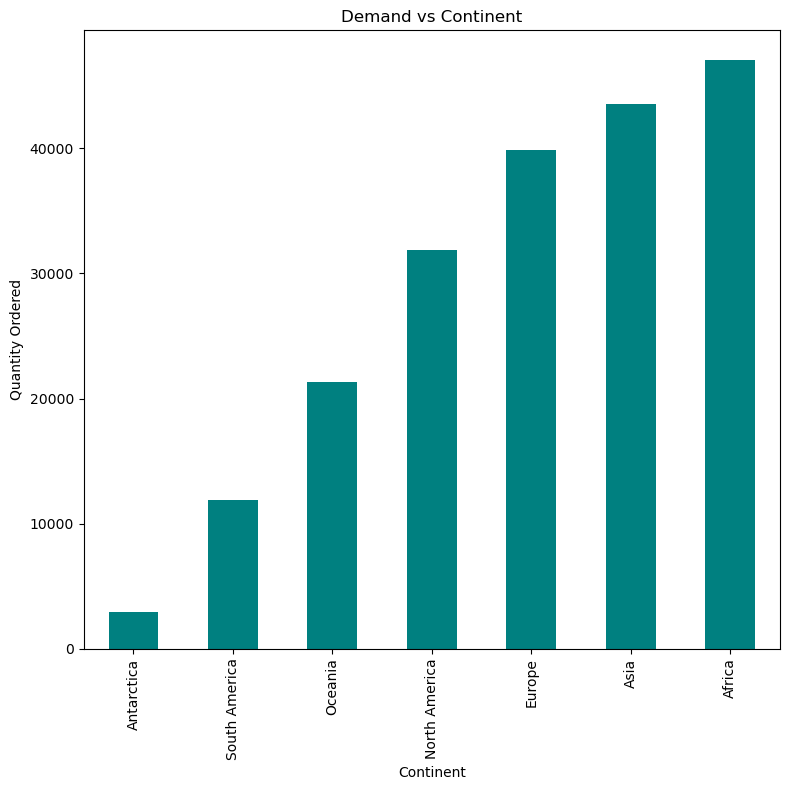

In [43]:
import matplotlib.pyplot as plt
top_products = top_products = X.groupby('CONTINENT')['QUANTITYORDERED'].sum().sort_values(ascending=True)

#plot the bar chart
plt.figure(figsize=(8,8)) #define figure size

#plot the bar chart
top_products.plot(kind='bar', color='teal')

#define title of chart
plt.title('Demand vs Continent')

#define label for chart
plt.xlabel('Continent')
plt.ylabel('Quantity Ordered')

#display chart
plt.tight_layout()
plt.show()


In [44]:
#identify average revenue across continent
X.groupby('CONTINENT')['SALES'].mean()


CONTINENT
Africa           2485.420105
Antarctica       2449.842134
Asia             2499.406060
Europe           2527.640335
North America    2492.762449
Oceania          2446.053503
South America    2366.452490
Name: SALES, dtype: float64

<Figure size 800x800 with 0 Axes>

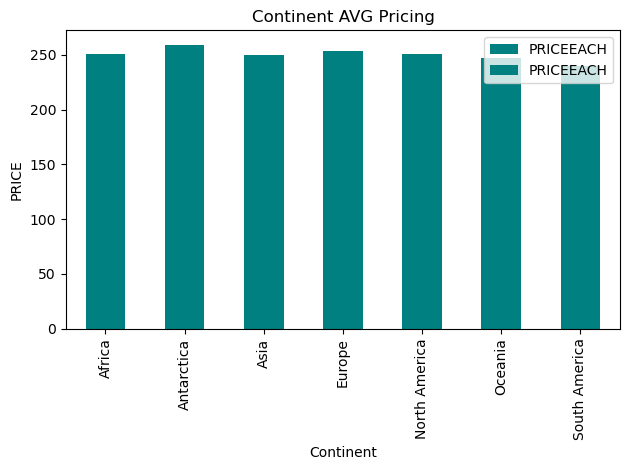

In [45]:
#visualize the avg pricing across the continent
price =X.groupby('CONTINENT')['PRICEEACH'].mean()

#plot a bar chart
plt.figure(figsize=(8,8)) #defne the figuresize

#plot line chart
price.plot(kind='bar', color='teal')

#title of bar chart
plt.title('Continent AVG Pricing')

#define labels for bar chart; x-xis and y-axis
plt.xlabel('Continent')
plt.ylabel('PRICE')

#display the barchart
plt.tight_layout()
plt.show()

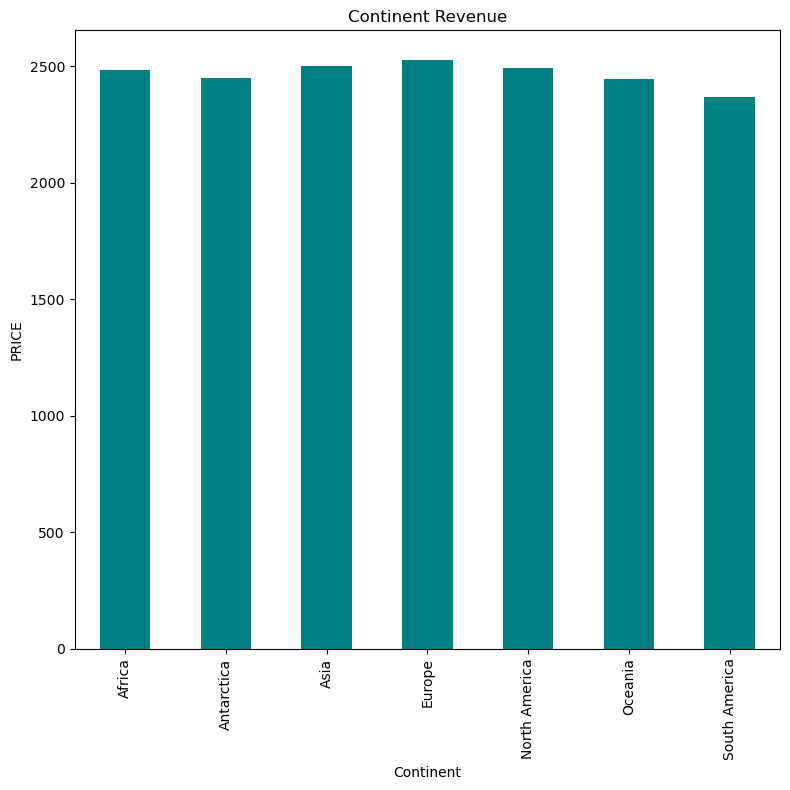

In [46]:
#identify the average revenue across the continent
price =X.groupby('CONTINENT')['SALES'].mean()

#plot a bar chart
plt.figure(figsize=(8,8)) 
price.plot(kind='bar', color='teal')
plt.title('Continent Revenue')
plt.xlabel('Continent')
plt.ylabel('PRICE')
plt.tight_layout()
plt.show()

### **Product Demand & Revenue**

In [47]:
X.groupby('PRODUCTNAME')['QUANTITYORDERED'].sum().sort_values(ascending=False)

PRODUCTNAME
Running Shoes            7065.0
Cookbook                 7029.0
Summer T-Shirt           6915.0
Shampoo                  6894.0
Vacuum Cleaner           6843.0
Hoodie                   6831.0
Bluetooth Speaker        6824.0
Lipstick Set             6814.0
Smartwatch               6776.0
Sunscreen                6771.0
Perfume                  6765.0
Cookware Set             6749.0
Dumbbell Set             6744.0
Coffee Maker             6700.0
Leather Jacket           6659.0
Yoga Mat                 6590.0
Mystery Novel            6567.0
Science Fiction Novel    6562.0
Biography                6552.0
Blender Set              6530.0
Soccer Ball              6492.0
Smartphone               6491.0
Tennis Racket            6437.0
History Book             6424.0
Laptop                   6418.0
Running Shorts           6369.0
Face Cream               6259.0
Wireless Headphones      6219.0
Jeans                    6174.0
Air Fryer                5997.0
Name: QUANTITYORDERED, dtype

In [48]:
X.groupby('PRODUCTNAME')['PRICEEACH'].mean()

,PRICEEACH,PRICEEACH
PRODUCTNAME,,
Air Fryer,246.412413,246.412413
Biography,260.264420,260.264420
Blender Set,253.061162,253.061162
Bluetooth Speaker,254.333652,254.333652
Coffee Maker,250.070778,250.070778
Cookbook,253.817980,253.817980
Cookware Set,245.785132,245.785132
Dumbbell Set,248.546880,248.546880
Face Cream,254.644664,254.644664


In [49]:
X.columns

Index(['PRODUCTLINE', 'PRODUCTNAME', 'PRICEEACH', 'ORDERDATE', 'COUNTRY',
       'CITY', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 'QUANTITYORDERED',
       'PRICEEACH', 'SALES', 'CONTINENT'],
      dtype='object')

In [50]:
X.groupby('PRODUCTNAME')['QUANTITYORDERED'].sum().div(X['QUANTITYORDERED'].sum()).sort_values(ascending=False)

PRODUCTNAME
Running Shoes            0.035599
Cookbook                 0.035418
Summer T-Shirt           0.034843
Shampoo                  0.034737
Vacuum Cleaner           0.034480
Hoodie                   0.034420
Bluetooth Speaker        0.034385
Lipstick Set             0.034334
Smartwatch               0.034143
Sunscreen                0.034118
Perfume                  0.034087
Cookware Set             0.034007
Dumbbell Set             0.033982
Coffee Maker             0.033760
Leather Jacket           0.033553
Yoga Mat                 0.033206
Mystery Novel            0.033090
Science Fiction Novel    0.033065
Biography                0.033014
Blender Set              0.032903
Soccer Ball              0.032712
Smartphone               0.032707
Tennis Racket            0.032435
History Book             0.032369
Laptop                   0.032339
Running Shorts           0.032092
Face Cream               0.031538
Wireless Headphones      0.031336
Jeans                    0.031110
Ai

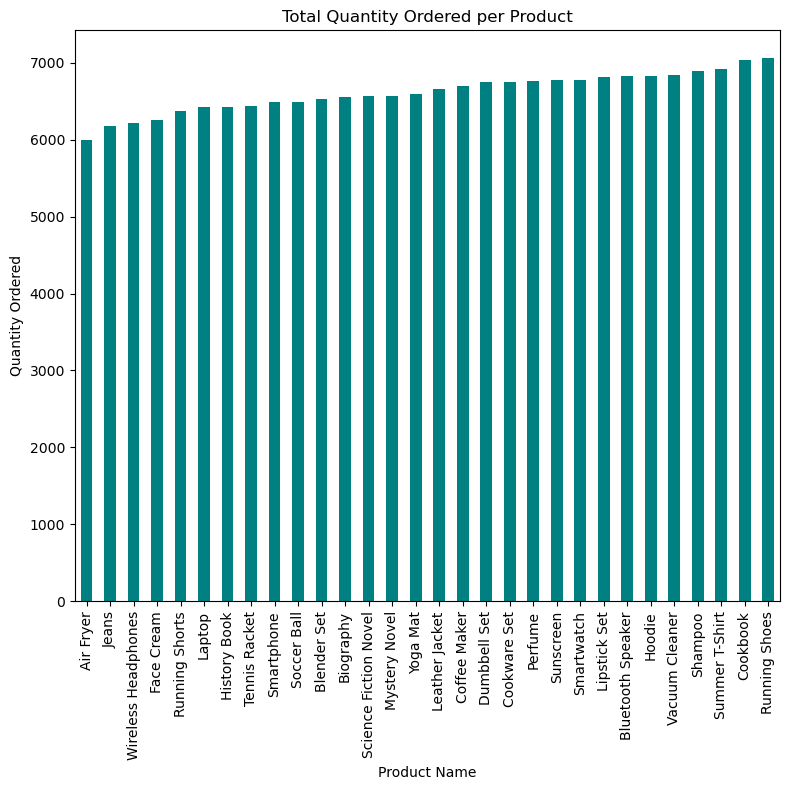

In [51]:
#viualize the volume of demand for product
import matplotlib.pyplot as plt
top_products = top_products = X.groupby('PRODUCTNAME')['QUANTITYORDERED'].sum().sort_values(ascending=True)

#plot a bar chart
plt.figure(figsize=(8,8))
top_products.plot(kind='bar', color='teal')
plt.title('Total Quantity Ordered per Product')
plt.xlabel('Product Name')
plt.ylabel('Quantity Ordered')
plt.tight_layout()
plt.show()


### **Time Trend**

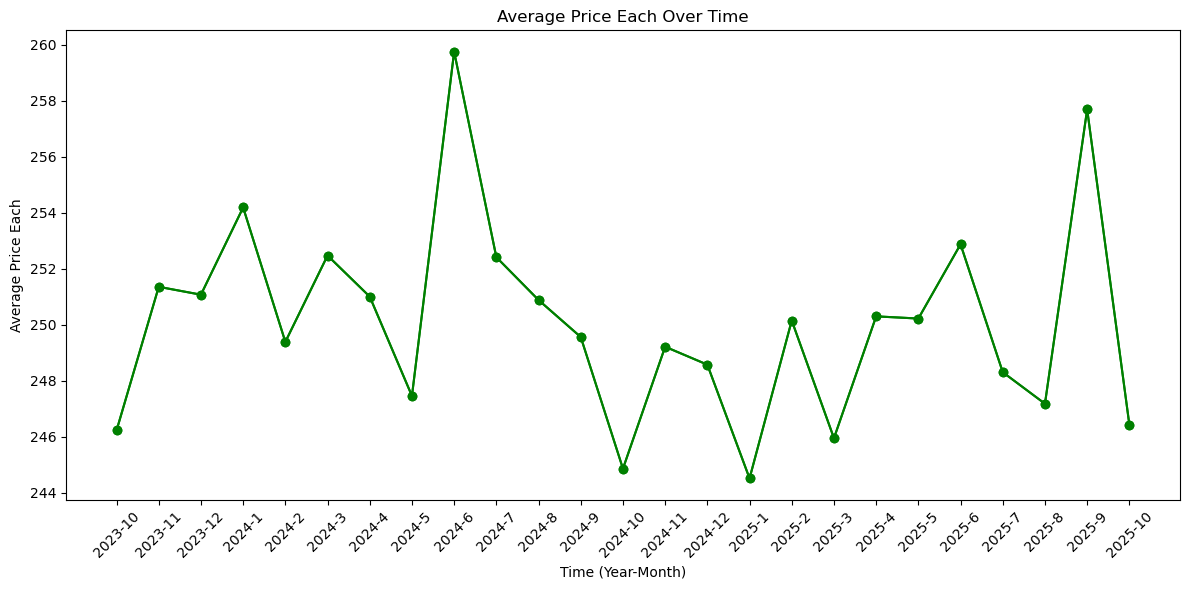

In [52]:
# Group and reset index
time_demand = X.groupby(['YEAR_ID', 'MONTH_ID'])['PRICEEACH'].mean().reset_index()

# Create a continuous time column
time_demand['TIME'] = time_demand['YEAR_ID'].astype(str) + '-' + time_demand['MONTH_ID'].astype(str)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(time_demand['TIME'], time_demand['PRICEEACH'], marker='o', color='green')
plt.title('Average Price Each Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Price Each')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


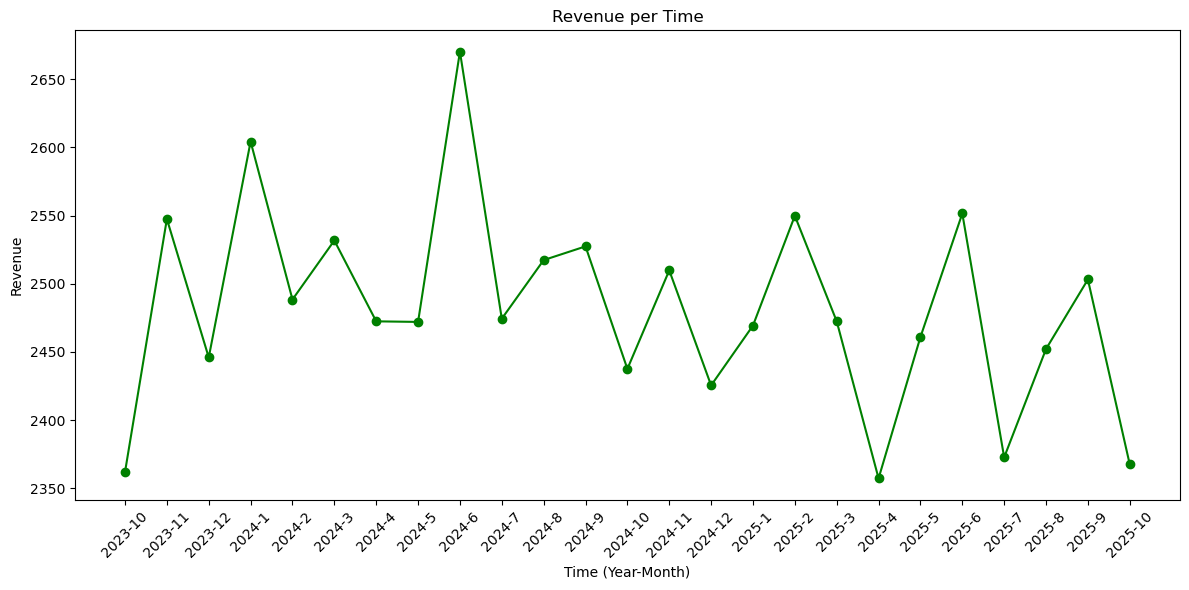

In [53]:
# Group and reset index
time_demand = X.groupby(['YEAR_ID', 'MONTH_ID'])['SALES'].mean().reset_index()

# Create a continuous time column
time_demand['TIME'] = time_demand['YEAR_ID'].astype(str) + '-' + time_demand['MONTH_ID'].astype(str)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(time_demand['TIME'], time_demand['SALES'], marker='o', color='green')
plt.title('Revenue per Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


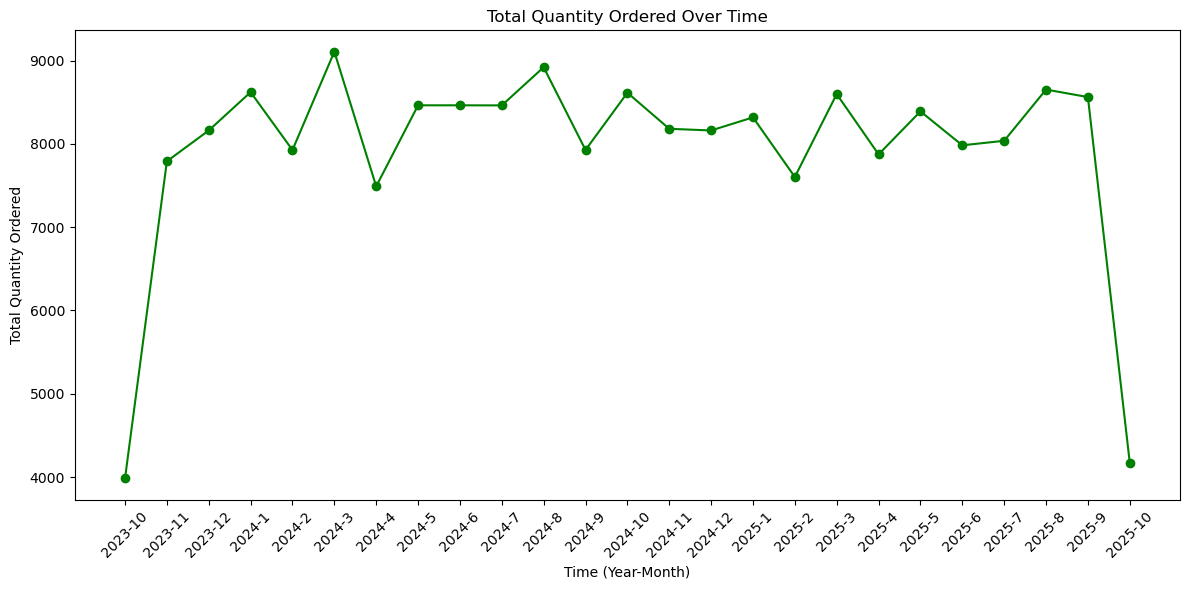

In [54]:
# Aggregate total quantity ordered per month/year
time_demand = X.groupby(['YEAR_ID', 'MONTH_ID'])['QUANTITYORDERED'].sum().reset_index()

# Create a continuous time index
time_demand['TIME'] = time_demand['YEAR_ID'].astype(str) + '-' + time_demand['MONTH_ID'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(time_demand['TIME'], time_demand['QUANTITYORDERED'], marker='o', color='green')
plt.title('Total Quantity Ordered Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [57]:
#replace misspelled values
X['STATUS'] = X['STATUS'].replace('Canceled', 'Cancelled')
X['STATUS'] = X['STATUS'].replace('OnHold', 'On Hold')


X['STATUS']= X['STATUS'].replace('Shpipped', 'Shipped')

C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3294986553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['STATUS'] = X['STATUS'].replace('Canceled', 'Cancelled')
C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3294986553.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['STATUS'] = X['STATUS'].replace('OnHold', 'On Hold')
C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3294986553.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

### **Status of Products and Deal Size**

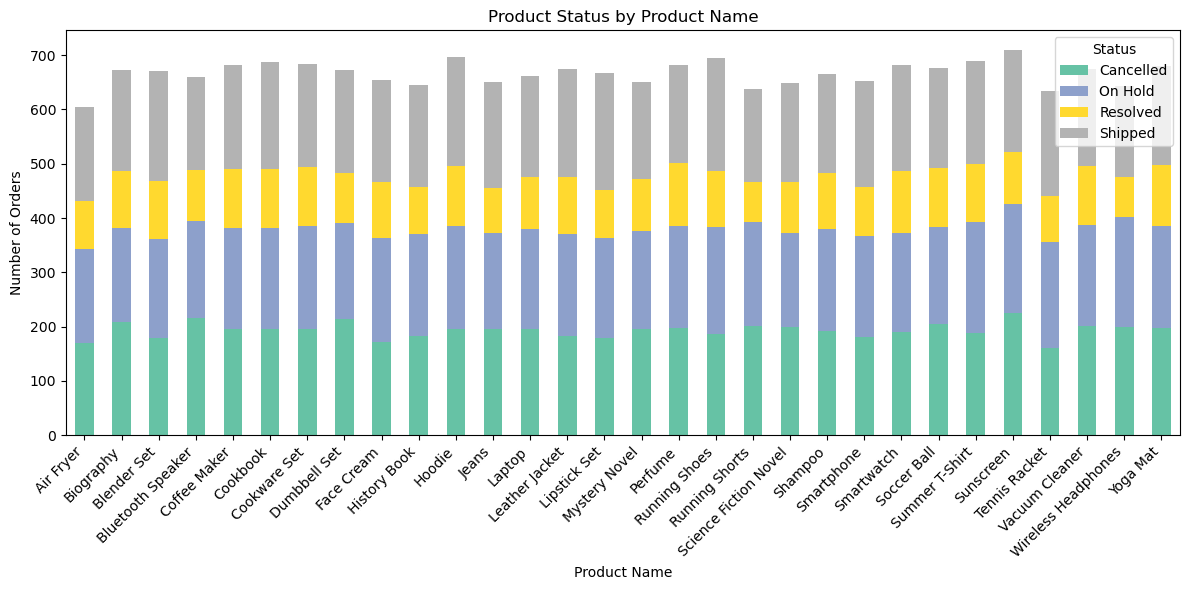

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a crosstab: counts of STATUS per PRODUCTNAME
status_counts = pd.crosstab(X['PRODUCTNAME'], X['STATUS'])

# Plot a stacked bar chart
status_counts.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Product Status by Product Name')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()


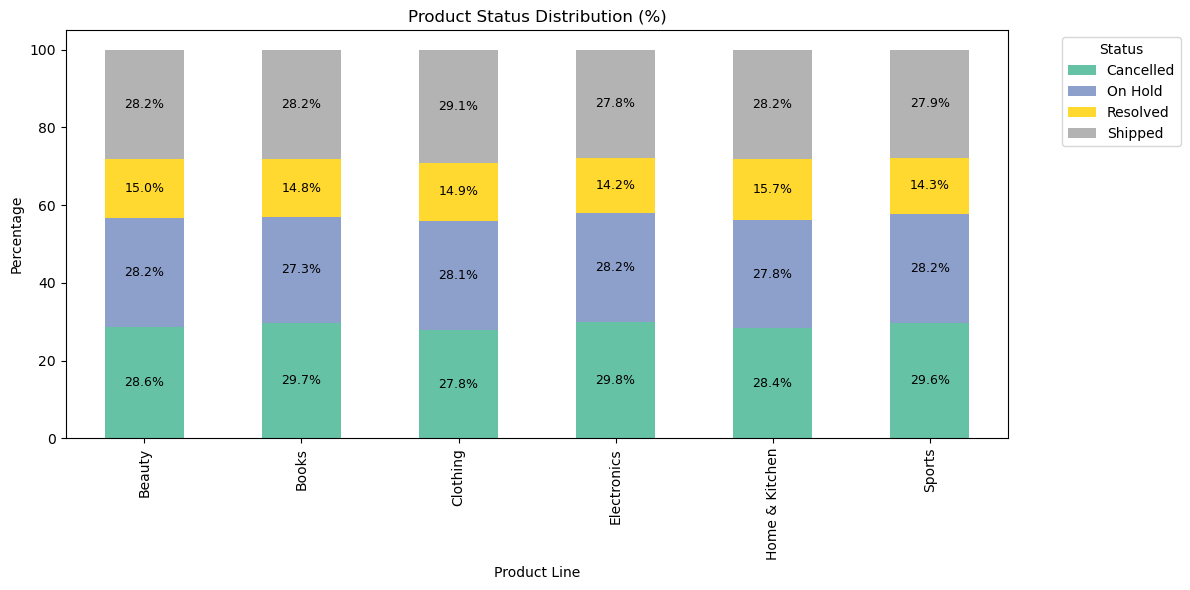

In [59]:


# 1. Calculate counts per product and status
status_counts = X.groupby(['PRODUCTLINE', 'STATUS']).size().unstack(fill_value=0)

# 2. Convert counts to percentages
status_percent = status_counts.div(status_counts.sum(axis=1), axis=0) * 100

# 3. Plot stacked bar chart
ax = status_percent.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

# 4. Add percentage labels
for i, product in enumerate(status_percent.index):
    cumulative = 0
    for status in status_percent.columns:
        value = status_percent.loc[product, status]
        if value > 0:  # Only show label if value > 0
            ax.text(i, cumulative + value/2, f'{value:.1f}%', ha='center', va='center', fontsize=9, color='black')
            cumulative += value

plt.title('Product Status Distribution (%)')
plt.ylabel('Percentage')
plt.xlabel('Product Line')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


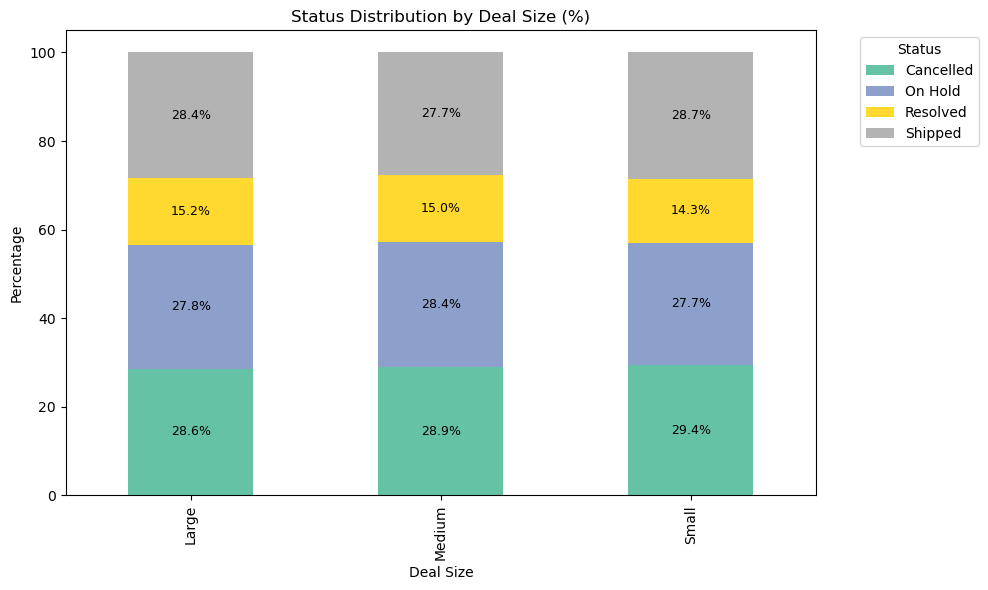

In [60]:


# Group by DEALSIZE and STATUS, count orders
deal_status_counts = X.groupby(['DEALSIZE', 'STATUS']).size().unstack(fill_value=0)

# Convert to percentages
deal_status_percent = deal_status_counts.div(deal_status_counts.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = deal_status_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

# Add labels
for i, deal in enumerate(deal_status_percent.index):
    cumulative = 0
    for status in deal_status_percent.columns:
        value = deal_status_percent.loc[deal, status]
        if value > 0:
            ax.text(i, cumulative + value/2, f'{value:.1f}%', ha='center', va='center', fontsize=9)
            cumulative += value

plt.title('Status Distribution by Deal Size (%)')
plt.ylabel('Percentage')
plt.xlabel('Deal Size')
plt.legend(title='Status', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


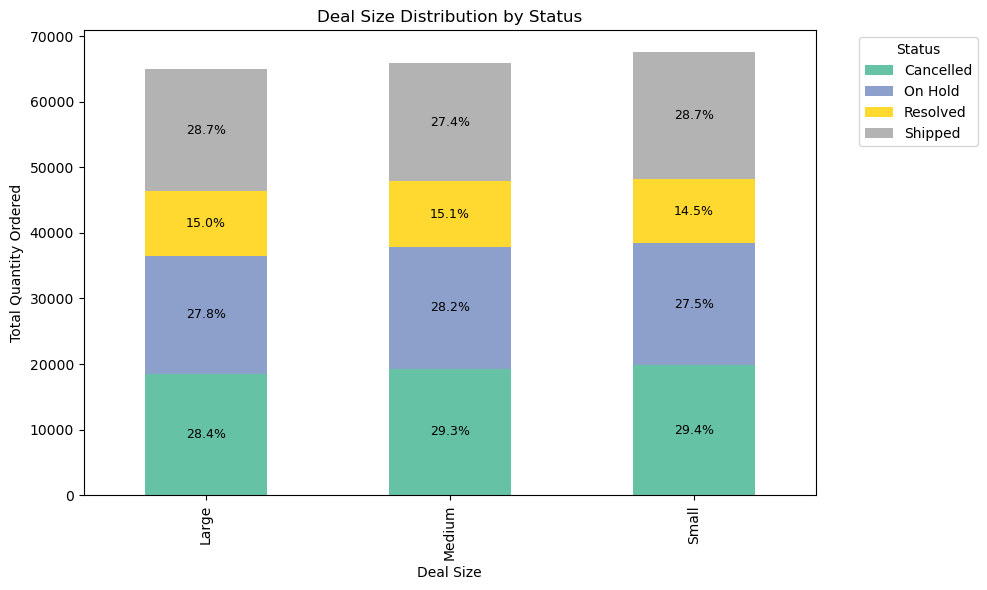

In [61]:
# Sum QUANTITYORDERED per DEALSIZE and STATUS
deal_status_sum = X.groupby(['DEALSIZE', 'STATUS'])['QUANTITYORDERED'].sum().unstack(fill_value=0)

# Plot stacked bar chart
ax = deal_status_sum.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

# Add labels for percentages
for i, deal in enumerate(deal_status_sum.index):
    total = deal_status_sum.loc[deal].sum()
    cumulative = 0
    for status in deal_status_sum.columns:
        value = deal_status_sum.loc[deal, status]
        if value > 0:
            perc = value / total * 100
            ax.text(i, cumulative + value/2, f'{perc:.1f}%', ha='center', va='center', fontsize=9)
            cumulative += value

plt.title('Deal Size Distribution by Status')
plt.ylabel('Total Quantity Ordered')
plt.xlabel('Deal Size')
plt.legend(title='Status', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


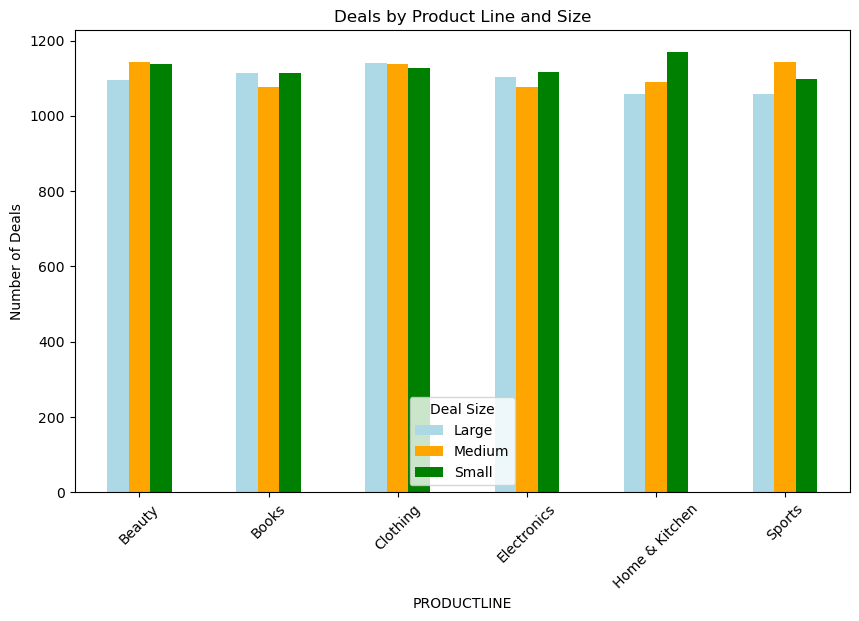

In [62]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by PRODUCTLINE and DEALSIZE
deal_summary = X.groupby(['PRODUCTLINE', 'DEALSIZE']).size().unstack(fill_value=0)

# Plot grouped bar chart
deal_summary.plot(kind='bar', figsize=(10,6), color=['lightblue', 'orange', 'green'])
plt.ylabel('Number of Deals')
plt.title('Deals by Product Line and Size')
plt.xticks(rotation=45)
plt.legend(title='Deal Size')
plt.show()


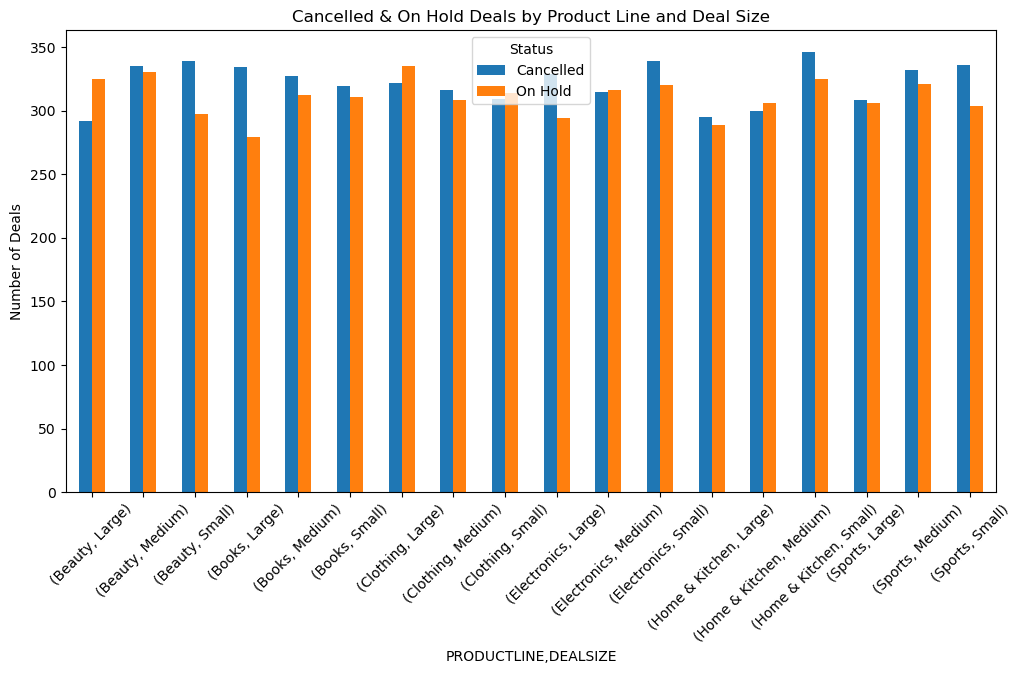

In [63]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only Cancelled and On Hold deals
filtered = X[X['STATUS'].isin(['Cancelled', 'On Hold'])]

# Group by PRODUCTLINE, DEALSIZE, and STATUS
deal_summary = filtered.groupby(['PRODUCTLINE', 'DEALSIZE', 'STATUS']).size().unstack('STATUS', fill_value=0)

# Plot grouped bar chart
deal_summary.plot(kind='bar', figsize=(12,6))
plt.ylabel('Number of Deals')
plt.title('Cancelled & On Hold Deals by Product Line and Deal Size')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()


In [64]:
X.columns

Index(['PRODUCTLINE', 'PRODUCTNAME', 'PRICEEACH', 'ORDERDATE', 'COUNTRY',
       'CITY', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 'QUANTITYORDERED',
       'PRICEEACH', 'SALES', 'CONTINENT'],
      dtype='object')

### **Encode Categorical Features**

In [65]:
from sklearn.preprocessing import LabelEncoder

columns = ['PRODUCTLINE', 'PRODUCTNAME', 'STATUS', 'DEALSIZE', 'CONTINENT']
mappings = {}  # store mapping for each column

for col in columns:
    le = LabelEncoder()
    le.fit(X[col])  # Fit on original column
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Save mapping BEFORE replacing
    X[col] = le.transform(X[col])  # Now replace original column with numbers


C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3327257707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.transform(X[col])  # Now replace original column with numbers
C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3327257707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.transform(X[col])  # Now replace original column with numbers
C:\Users\MIKE OKWUDOLOR\AppData\Local\Temp\ipykernel_1144\3327257707.py:10: SettingWithCopyWarning: 
A value is trying t

In [66]:
# Now you can check the mapping for any column
print("DEALSIZE mapping:", mappings['DEALSIZE'])
print("CONTINENT mapping:", mappings['CONTINENT'])
print("PRODUCTLINE mapping:", mappings['PRODUCTLINE'])
print("PRODUCTNAME mapping:", mappings['PRODUCTNAME'])
print("STATUS mapping:", mappings['STATUS'])

DEALSIZE mapping: {'Large': np.int64(0), 'Medium': np.int64(1), 'Small': np.int64(2)}
CONTINENT mapping: {'Africa': np.int64(0), 'Antarctica': np.int64(1), 'Asia': np.int64(2), 'Europe': np.int64(3), 'North America': np.int64(4), 'Oceania': np.int64(5), 'South America': np.int64(6)}
PRODUCTLINE mapping: {'Beauty': np.int64(0), 'Books': np.int64(1), 'Clothing': np.int64(2), 'Electronics': np.int64(3), 'Home & Kitchen': np.int64(4), 'Sports': np.int64(5)}
PRODUCTNAME mapping: {'Air Fryer': np.int64(0), 'Biography': np.int64(1), 'Blender Set': np.int64(2), 'Bluetooth Speaker': np.int64(3), 'Coffee Maker': np.int64(4), 'Cookbook': np.int64(5), 'Cookware Set': np.int64(6), 'Dumbbell Set': np.int64(7), 'Face Cream': np.int64(8), 'History Book': np.int64(9), 'Hoodie': np.int64(10), 'Jeans': np.int64(11), 'Laptop': np.int64(12), 'Leather Jacket': np.int64(13), 'Lipstick Set': np.int64(14), 'Mystery Novel': np.int64(15), 'Perfume': np.int64(16), 'Running Shoes': np.int64(17), 'Running Shorts': 

In [67]:
X.head()

,PRODUCTLINE,PRODUCTNAME,PRICEEACH,ORDERDATE,COUNTRY,CITY,DEALSIZE,MONTH_ID,YEAR_ID,STATUS,QUANTITYORDERED,PRICEEACH,SALES,CONTINENT
0,5,7,49.22,2025-08-26,Syrian Arab Republic,Michelleberg,2,8,2025,0,7.0,49.22,344.54,2
1,1,15,217.14,2025-07-31,Peru,West Stevenfurt,2,7,2025,0,18.0,217.14,3908.52,6
2,3,21,240.78,2025-10-04,Kuwait,South Josephside,0,10,2025,1,15.0,240.78,3611.70,2
3,1,19,148.20,2025-09-12,Chad,North Gregory,2,9,2025,1,11.0,148.20,1630.20,0
4,4,27,128.16,2024-12-25,Belarus,Port Charlesville,0,12,2024,3,15.0,128.16,1922.40,3


In [68]:
#save encodd data
X.to_csv('X_encoded.csv', index=False)

### **ML Modelling Pipeline**

In [69]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('C:/USERS/MIKE OKWUDOLOR/Documents/X_encoded.csv')

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

#  Date Features 
df['day'] = df['ORDERDATE'].dt.day
df['day_of_week'] = df['ORDERDATE'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['quarter'] = df['ORDERDATE'].dt.quarter

# Cyclical Encoding 
df['Month_sin'] = np.sin(2 * np.pi * df['MONTH_ID'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['MONTH_ID'] / 12)
df['week_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)

# Sort by Product and Date 
df = df.sort_values(['PRODUCTNAME', 'ORDERDATE'])

# Lag Features 
for i in range(1, 7):
    df[f'lag{i}'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].shift(i)
    df[f'lag_{i}'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].shift(i)

# Rolling Window Features 
df['mean_rolling'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].transform(lambda x: x.rolling(3).mean())
df['sum_rolling'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].transform(lambda x: x.rolling(3).sum())
df['max_rolling'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].transform(lambda x: x.rolling(3).max())
df['min_rolling'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].transform(lambda x: x.rolling(3).min())
df['std_rolling'] = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].transform(lambda x: x.rolling(3).std())

df['mean3_rolling'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].transform(lambda x: x.rolling(3).mean())
df['sum3_rolling'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].transform(lambda x: x.rolling(3).sum())
df['max3_rolling'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].transform(lambda x: x.rolling(3).max())
df['min3_rolling'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].transform(lambda x: x.rolling(3).min())
df['std3_rolling'] = df.groupby(['PRODUCTLINE', 'STATUS'])['QUANTITYORDERED'].transform(lambda x: x.rolling(3).std())

# Handle Missing Values 
df.fillna(0, inplace=True)

# Define Features and Target
X = df[['PRODUCTLINE', 'PRODUCTNAME', 'PRICEEACH', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 
        'SALES', 'CONTINENT', 'day', 'day_of_week', 'is_weekend', 'quarter',
        'Month_sin', 'Month_cos', 'week_cos', 'week_sin',
        'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
        'mean_rolling', 'sum_rolling', 'max_rolling', 'min_rolling', 'std_rolling',
        'mean3_rolling', 'sum3_rolling', 'max3_rolling', 'min3_rolling', 'std3_rolling']]

y = df['QUANTITYORDERED']

# Train-Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# XGBoost Model
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

xgb.fit(x_train, y_train)

# prediction 
y_pred = xgb.predict(x_test)


In [70]:
from sklearn.metrics import mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)


RMSE: 0.36837923199681216
MAE: 0.26218770097692806
R² Score: 0.995602994110903


In [71]:
# Check that your last few training dates come before test dates
print("Train end date:", x_train.index.max())
print("Test start date:", x_test.index.min())

Train end date: 19998
Test start date: 2


In [72]:

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.sort_values('ORDERDATE')

# Split data (example)
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Display correct date ranges
print("Train end date:", train['ORDERDATE'].max())
print("Test start date:", test['ORDERDATE'].min())


Train end date: 2025-05-24 00:00:00
Test start date: 2025-05-25 00:00:00


In [73]:
# Create Inventory Forecast DataFrame
test_results = x_test.copy()
test_results['Actual'] = y_test.values
test_results['Predicted'] = y_pred

#  Example: Current stock levels (replace with real data)
# You can create this based on your actual inventory records or a simple random example
current_stock_data = np.random.randint(5, 50, size=len(test_results))

# Inventory Forecast and Restock Suggestions
inventory_forecast = test_results.copy()
inventory_forecast['Current_Stock'] = current_stock_data
inventory_forecast['Restock_Needed'] = inventory_forecast['Predicted'] > inventory_forecast['Current_Stock']
inventory_forecast['Suggested_Restock_Qty'] = (
    inventory_forecast['Predicted'] - inventory_forecast['Current_Stock']
).clip(lower=0)

# 🖨️ Display sample forecast results
display(
    inventory_forecast[['PRODUCTLINE', 'Predicted', 'Current_Stock', 'Suggested_Restock_Qty']].head(10)
)


,PRODUCTLINE,Predicted,Current_Stock,Suggested_Restock_Qty
13226,3,5.821024,21,0.0
6777,3,10.054037,25,0.0
17927,3,2.052340,38,0.0
13746,3,0.976394,7,0.0
9252,3,7.342198,48,0.0
1836,3,0.982476,31,0.0
17730,3,6.911005,41,0.0
10140,3,18.480289,31,0.0
17826,3,2.170726,23,0.0
3214,3,4.978744,36,0.0


In [74]:
# 🔹 Mapping Dictionaries

DEALSIZE_mapping = {
    'Large': 0,
    'Medium': 1,
    'Small': 2
}

CONTINENT_mapping = {
    'Africa': 0,
    'Antarctica': 1,
    'Asia': 2,
    'Europe': 3,
    'North America': 4,
    'Oceania': 5,
    'South America': 6
}

PRODUCTLINE_mapping = {
    'Beauty': 0,
    'Books': 1,
    'Clothing': 2,
    'Electronics': 3,
    'Home & Kitchen': 4,
    'Sports': 5
}

PRODUCTNAME_mapping = {
    'Air Fryer': 0,
    'Biography': 1,
    'Blender Set': 2,
    'Bluetooth Speaker': 3,
    'Coffee Maker': 4,
    'Cookbook': 5,
    'Cookware Set': 6,
    'Dumbbell Set': 7,
    'Face Cream': 8,
    'History Book': 9,
    'Hoodie': 10,
    'Jeans': 11,
    'Laptop': 12,
    'Leather Jacket': 13,
    'Lipstick Set': 14,
    'Mystery Novel': 15,
    'Perfume': 16,
    'Running Shoes': 17,
    'Running Shorts': 18,
    'Science Fiction Novel': 19,
    'Shampoo': 20,
    'Smartphone': 21,
    'Smartwatch': 22,
    'Soccer Ball': 23,
    'Summer T-Shirt': 24,
    'Sunscreen': 25,
    'Tennis Racket': 26,
    'Vacuum Cleaner': 27,
    'Wireless Headphones': 28,
    'Yoga Mat': 29
}

STATUS_mapping = {
    'Cancelled': 0,
    'On Hold': 1,
    'Resolved': 2,
    'Shipped': 3
}


In [75]:
# Reverse lookup example
reverse_PRODUCTLINE = {v: k for k, v in PRODUCTLINE_mapping.items()}
reverse_STATUS = {v: k for k, v in STATUS_mapping.items()}

# Example usage
print(reverse_PRODUCTLINE[3])  # Output: 'Electronics'
print(reverse_STATUS[3])       # Output: 'Shipped'


Electronics
Shipped


In [76]:
# 🔹 Reverse mappings for decoding
reverse_DEALSIZE = {v: k for k, v in DEALSIZE_mapping.items()}
reverse_CONTINENT = {v: k for k, v in CONTINENT_mapping.items()}
reverse_PRODUCTLINE = {v: k for k, v in PRODUCTLINE_mapping.items()}
reverse_PRODUCTNAME = {v: k for k, v in PRODUCTNAME_mapping.items()}
reverse_STATUS = {v: k for k, v in STATUS_mapping.items()}

# Decode numeric values in your DataFrame
inventory_forecast['PRODUCTLINE'] = inventory_forecast['PRODUCTLINE'].map(reverse_PRODUCTLINE)
if 'DEALSIZE' in inventory_forecast.columns:
    inventory_forecast['DEALSIZE'] = inventory_forecast['DEALSIZE'].map(reverse_DEALSIZE)
if 'STATUS' in inventory_forecast.columns:
    inventory_forecast['STATUS'] = inventory_forecast['STATUS'].map(reverse_STATUS)
if 'CONTINENT' in inventory_forecast.columns:
    inventory_forecast['CONTINENT'] = inventory_forecast['CONTINENT'].map(reverse_CONTINENT)
if 'PRODUCTNAME' in inventory_forecast.columns:
    inventory_forecast['PRODUCTNAME'] = inventory_forecast['PRODUCTNAME'].map(reverse_PRODUCTNAME)

#  Display cleaned-up readable results
display(inventory_forecast[['PRODUCTLINE', 'Predicted', 'Current_Stock','Suggested_Restock_Qty', 'PRODUCTNAME', 'PRICEEACH', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 
        'SALES', 'CONTINENT', 'day', 'day_of_week', 'is_weekend', 'quarter',
        'Month_sin', 'Month_cos', 'week_cos', 'week_sin',
        'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
        'mean_rolling', 'sum_rolling', 'max_rolling', 'min_rolling', 'std_rolling',
        'mean3_rolling', 'sum3_rolling', 'max3_rolling', 'min3_rolling', 'std3_rolling' ]].head(10))


,PRODUCTLINE,Predicted,Current_Stock,Suggested_Restock_Qty,PRODUCTNAME,PRICEEACH,DEALSIZE,MONTH_ID,YEAR_ID,STATUS,...,mean_rolling,sum_rolling,max_rolling,min_rolling,std_rolling,mean3_rolling,sum3_rolling,max3_rolling,min3_rolling,std3_rolling
13226,Electronics,5.821024,21,0.0,Smartphone,43.99,Small,12,2023,Shipped,...,13.333333,40.0,19.0,6.0,6.658328,14.000000,42.0,18.0,6.0,6.928203
6777,Electronics,10.054037,25,0.0,Smartphone,497.17,Large,12,2023,Shipped,...,11.333333,34.0,19.0,6.0,6.806859,11.000000,33.0,18.0,6.0,6.244998
17927,Electronics,2.052340,38,0.0,Smartphone,118.20,Small,12,2023,Resolved,...,5.666667,17.0,9.0,2.0,3.511885,5.666667,17.0,8.0,2.0,3.214550
13746,Electronics,0.976394,7,0.0,Smartphone,343.59,Medium,12,2023,On Hold,...,4.000000,12.0,9.0,1.0,4.358899,5.666667,17.0,12.0,1.0,5.686241
9252,Electronics,7.342198,48,0.0,Smartphone,347.52,Medium,12,2023,Cancelled,...,3.333333,10.0,7.0,1.0,3.214550,13.666667,41.0,19.0,7.0,6.110101
1836,Electronics,0.982476,31,0.0,Smartphone,343.61,Large,12,2023,On Hold,...,3.000000,9.0,7.0,1.0,3.464102,4.666667,14.0,12.0,1.0,6.350853
17730,Electronics,6.911005,41,0.0,Smartphone,221.27,Large,12,2023,On Hold,...,5.000000,15.0,7.0,1.0,3.464102,3.000000,9.0,7.0,1.0,3.464102
10140,Electronics,18.480289,31,0.0,Smartphone,438.60,Medium,12,2023,Cancelled,...,8.666667,26.0,18.0,1.0,8.621678,14.666667,44.0,19.0,7.0,6.658328
17826,Electronics,2.170726,23,0.0,Smartphone,62.58,Small,12,2023,Cancelled,...,9.333333,28.0,18.0,3.0,7.767453,9.333333,28.0,18.0,3.0,7.767453
3214,Electronics,4.978744,36,0.0,Smartphone,269.68,Small,12,2023,Shipped,...,8.666667,26.0,18.0,3.0,8.144528,6.666667,20.0,9.0,5.0,2.081666


In [77]:
inventory_forecast[['PRODUCTLINE', 'Predicted', 'Current_Stock','Suggested_Restock_Qty', 'PRODUCTNAME', 'PRICEEACH', 'DEALSIZE', 'MONTH_ID', 'YEAR_ID', 'STATUS', 
        'SALES', 'CONTINENT', 'day', 'day_of_week', 'is_weekend', 'quarter',
        'Month_sin', 'Month_cos', 'week_cos', 'week_sin',
        'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6',
        'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6',
        'mean_rolling', 'sum_rolling', 'max_rolling', 'min_rolling', 'std_rolling',
        'mean3_rolling', 'sum3_rolling', 'max3_rolling', 'min3_rolling', 'std3_rolling' ]].to_csv(
    'inventory_forecast_readable.csv', index=False
)


In [78]:
# Show all code cells with markdown summaries
import nbformat
with open("demandforecasting.ipynb") as f:
    nb = nbformat.read(f, as_version=4)
for cell in nb.cells:
    if cell.cell_type == "markdown":
        print("### Markdown:", cell.source[:400], "\n")
    elif cell.cell_type == "code":
        print(">>> Code:", cell.source[:200], "\n")


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 864531: character maps to <undefined>